In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('scraped_data_team_11.csv').copy()

In [5]:
df

,Link,Price,Date,Text,Location,Area,Rooms,Located Floor,Number of Floors,Repair,Document
0,https://emlak.az/976268-satilir-3-otaqli-1052-...,['263 000'],13.12.2024,['Bakı Dövlət Universitetinin yaninda yerləşən...,['Ünvan: Əhməd Cəmil 23'],105.2 m2,3,17,17,Yaxşı təmirli,Çıxarış (Kupça)
1,https://emlak.az/1016051-satilir-3-otaqli-148-...,['326 000'],13.12.2024,['Elite City yaşayış kompleksinin mansardında...,['Ünvan: Zahid Xəlilov 30 A'],148 m2,3,17,17,Təmirsiz,Çıxarış (Kupça)
2,https://emlak.az/1157478-satilir-1-otaqli-6512...,['227 920'],13.12.2024,"['""Nizami City"" –nin 1ci ABC mərhələsi hazırdı...","['Ünvan: Yasamal r-nu, M.Muxtarov, İ.Ebilov, C...",65.12 m2,1,4,9,Təmirsiz,Müqavilə
3,https://emlak.az/1122541-satilir-4-otaqli-1134...,['170 100'],13.12.2024,['Mayak Residence - Bakı şəhərinin yeni simvol...,"['Ünvan: Suraxanı rayonu, Hətəm Allahverdiyev ...",113.4 m2,4,11,14,Təmirsiz,Müqavilə
4,https://emlak.az/1122546-satilir-4-otaqli-1172...,['210 960'],13.12.2024,['Mayak Residence - Bakı şəhərinin yeni simvol...,"['Ünvan: Suraxanı rayonu, Hətəm Allahverdiyev ...",117.2 m2,4,5,14,Əla təmirli,Müqavilə
...,...,...,...,...,...,...,...,...,...,...,...
3953,https://emlak.az/1173043-satilir-3-otaqli-104-...,['190 000'],26.11.2024,"['SATILIR!!!Xətai r, H.Aslanov m/s üstüSahə 10...",['Ünvan: Məhəmməd Hadi'],104 m2,3,16,17,Yaxşı təmirli,Çıxarış (Kupça)
3954,https://emlak.az/1176118-satilir-3-otaqli-88-m...,['185 000'],26.11.2024,"['Ərazinin ən böyük bazaya malik, rəsmi daşınm...",['Ünvan: Şirin Mirzəyev küçəsi'],88 m2,3,11,16,Təmirsiz,Çıxarış (Kupça)
3955,https://emlak.az/1176117-satilir-4-otaqli-114-...,['220 000'],26.11.2024,['Xətai rayonu Həzi Aslanov Qismət Mtk da yaxş...,['Ünvan: Gəncə Prospekti'],114 m2,4,6,16,Yaxşı təmirli,Müqavilə
3956,https://emlak.az/1176115-satilir-2-otaqli-75-m...,['235 000'],26.11.2024,['TƏCİLİ !Gənclik və Nərimanov metroları yaxın...,['Ünvan: Təbriz küç.'],75 m2,2,7,14,Əla təmirli,Müqavilə


### Feature Engineering

In [8]:
df['Price'] = df['Price'].str.replace('[', '').str.replace(']', '')
df['Price'] = df['Price'].str.strip(" ' '").str.replace(' ','').astype('int')
df.rename(columns={'Price': 'Price(AZN)'}, inplace=True)

In [10]:
df['Date_Day'] = [int(i[0]) for i in df['Date'].str.split('.')]

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y', errors='coerce')

In [14]:
df.drop(['Link'],axis=1,inplace=True)

In [16]:
df['Text'] = df['Text'].str.replace('[', '').str.replace(']', '')
df['Text'] = df['Text'].str.strip(" ' '")
df['Text'] = df['Text'].str.lower()

In [18]:
df['Location'] = df['Location'].str.replace('[','').str.replace(']','')
df['Location'] = df['Location'].str.strip(" ' '")
df['Location'] = df['Location'].str.replace('Ünvan: ','')
df['Location'] = df['Location'].str.lower()

In [20]:
df['Area'] = df['Area'].str.split(' ',expand=True)[0]
df['Area'] = df['Area'].astype('float')
df.rename(columns = {'Area':'Area/m2'},inplace=True)

In [22]:
df.isnull().sum()

Price(AZN)          0
Date                0
Text                0
Location            0
Area/m2             0
Rooms               0
Located Floor       0
Number of Floors    0
Repair              0
Document            6
Date_Day            0
dtype: int64

In [24]:
for i in ['Rooms','Located Floor','Number of Floors']:
    df[i] = df[i].astype('int')
    

In [26]:
for i in ['Repair', 'Document']:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19804\3390520571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [28]:
df['Location'] = df['Location'].str.replace('ı','i').str.replace('ə','e').str.replace('u','ü').str.replace('ç','c')

### Text Manipulation

In [31]:
df['Location'] = df['Location'].str.split(r'\s*(pros|şeher|seher|rayon|küc|qes|metro)\s*', expand=True)[0]

In [33]:
df['Location'].value_counts()

Location
tebriz                                     110
eliyar eliyev                               82
esed ehmedov                                69
azadliq                                     62
gence                                       55
                                          ... 
abay künanbayev k.                           1
xirdalan baki-sümqayit şossesi 7-ci km.      1
gülüstan 15                                  1
16m/r-n ,i̇smet qayibov k 3                  1
yasamal r, sübhi salayev                     1
Name: count, Length: 1167, dtype: int64

In [35]:
tecili = ['təcili', 'tecili', 'tecılı', 'təcılı']
df['Condition'] = df['Text'].apply(lambda x: 'tecili' if any(variant in x for variant in tecili) else None)
df['Condition'].fillna('bilinmir',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19804\2898889399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Condition'].fillna('bilinmir',inplace=True)


In [37]:
single_word_keywords = {
    'qaz': 'qaz',
    'su': 'su',
}

isiq_keywords = ['ısıq', 'isiq', 'isıq', 'ıwıq', 'iwiq', 'işıq', 'ışıq', 'işiq']

def find_utilities(text):
    utilities = []
    
    for keywords, utility in single_word_keywords.items():
        if utility in text:
            utilities.append(keywords)
        
    for i in isiq_keywords:
        if i in text and 'isiq' not in utilities:
            utilities.append('isiq')
    
    return ', '.join(utilities) if utilities else 'bilinmir'

df['Utility'] = df['Text'].apply(find_utilities)

In [39]:
is_near = ['park','yaşıl','mekteb','məktəb','universitet','univeristet','üniversitet','kollec','magistral',
           'magistiral','ticarət mərkəzi','kitabxana','idman','fitness','fitnes','turistik','restoran','kafe',
           'bazar', 'klinika', 'xəstəxana','xestexana','metro','astanofka','deniz','dəniz','gol','göl','cay',
           'çay','m/s']

def find_near(text):
    things = []
    for keyword in is_near:
        if keyword in text and keyword not in things:
            things.append(keyword)
    return ' '.join(things) if things else 'bilinmir'

In [41]:
df['Yaxinliqda var'] = df['Text'].apply(find_near)

In [43]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

azerbaijani_stopwords = stopwords.words('azerbaijani')

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in azerbaijani_stopwords]
    return ' '.join(filtered_tokens)

df['Text'] = df['Text'].apply(remove_stopwords)

In [44]:
df

,Price(AZN),Date,Text,Location,Area/m2,Rooms,Located Floor,Number of Floors,Repair,Document,Date_Day,Condition,Utility,Yaxinliqda var
0,263000,2024-12-13,bakı dövlət universitetinin yaninda yerləşən e...,ehmed cemil 23,105.20,3,17,17,Yaxşı təmirli,Çıxarış (Kupça),13,bilinmir,bilinmir,universitet
1,326000,2024-12-13,elite city yaşayış kompleksinin mansardında ye...,zahid xelilov 30 a,148.00,3,17,17,Təmirsiz,Çıxarış (Kupça),13,bilinmir,su,məktəb metro
2,227920,2024-12-13,`` nizami city '' –nin 1ci abc mərhələsi hazır...,"yasamal r-nü, m.müxtarov, i̇.ebilov, c.qaryağd...",65.12,1,4,9,Təmirsiz,Müqavilə,13,bilinmir,bilinmir,bilinmir
3,170100,2024-12-13,mayak residence - bakı şəhərinin yeni simvolu ...,süraxani,113.40,4,11,14,Təmirsiz,Müqavilə,13,bilinmir,su,park məktəb ticarət mərkəzi fitness fitnes baz...
4,210960,2024-12-13,mayak residence - bakı şəhərinin yeni simvolu ...,süraxani,117.20,4,5,14,Əla təmirli,Müqavilə,13,bilinmir,su,park məktəb ticarət mərkəzi fitness fitnes baz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,190000,2024-11-26,"satilir ! ! ! xətai r , h.aslanov m/s üstüsahə...",mehemmed hadi,104.00,3,16,17,Yaxşı təmirli,Çıxarış (Kupça),26,bilinmir,bilinmir,metro m/s
3954,185000,2024-11-26,"ərazinin böyük bazaya malik , rəsmi daşınmaz ə...",şirin mirzeyev,88.00,3,11,16,Təmirsiz,Çıxarış (Kupça),26,tecili,"qaz, su, isiq",park yaşıl məktəb fitness fitnes klinika metro
3955,220000,2024-11-26,xətai rayonu həzi aslanov qismət mtk təmirli m...,gence,114.00,4,6,16,Yaxşı təmirli,Müqavilə,26,bilinmir,bilinmir,park
3956,235000,2024-11-26,təci̇li̇ ! gənclik nərimanov metroları yaxınlı...,tebriz,75.00,2,7,14,Əla təmirli,Müqavilə,26,bilinmir,"qaz, su, isiq",metro


### Graphically Analysis

In [48]:
#Remove the outliers function
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

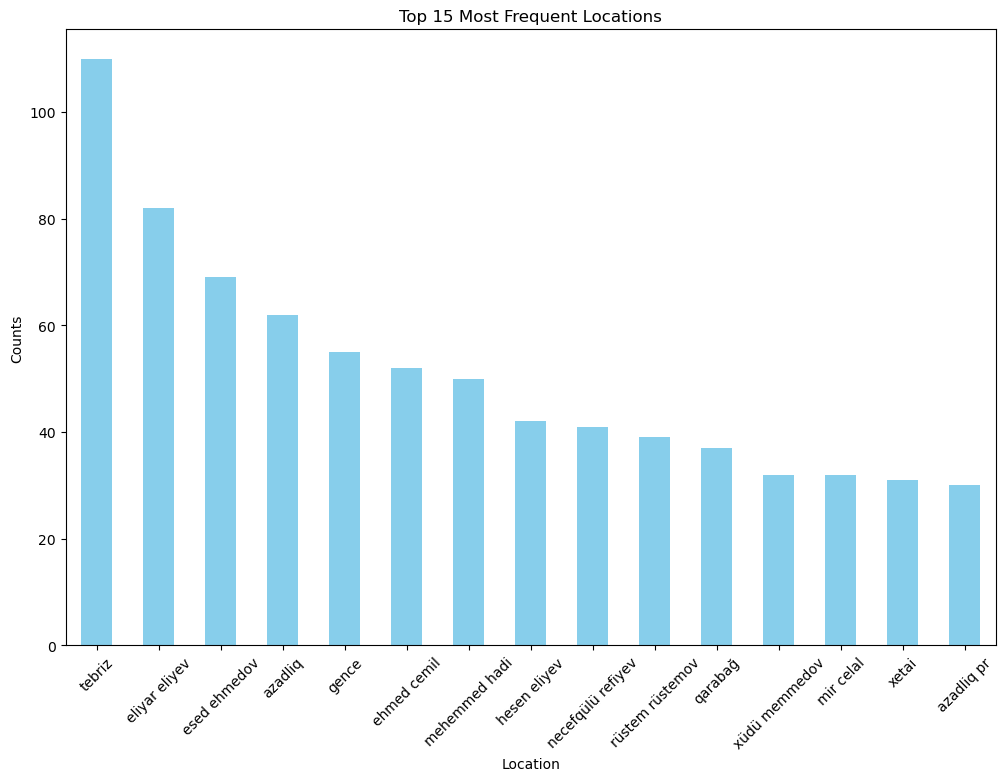

In [50]:
import matplotlib.pyplot as plt

top_15_locations = df['Location'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
top_15_locations.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Frequent Locations')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


In [51]:
df = remove_outliers_iqr(df, 'Area/m2')

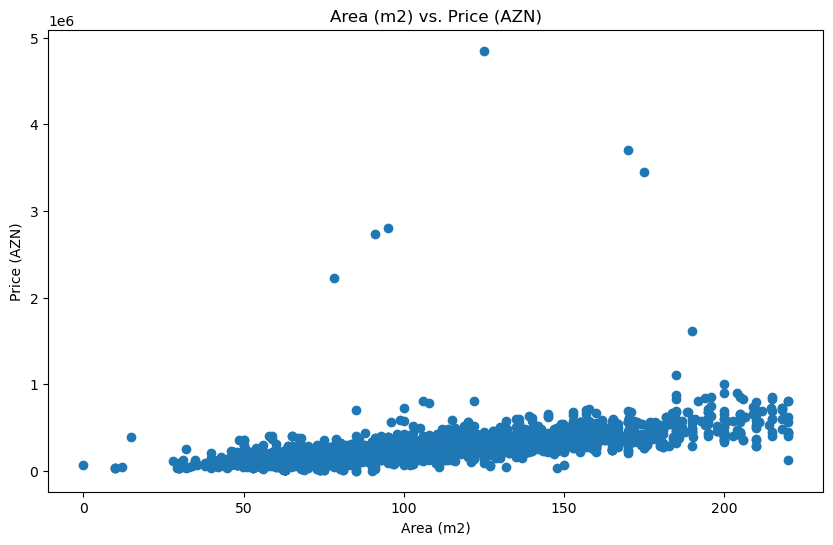

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Area/m2'], df['Price(AZN)'])
plt.title('Area (m2) vs. Price (AZN)')
plt.xlabel('Area (m2)')
plt.ylabel('Price (AZN)')
plt.show()


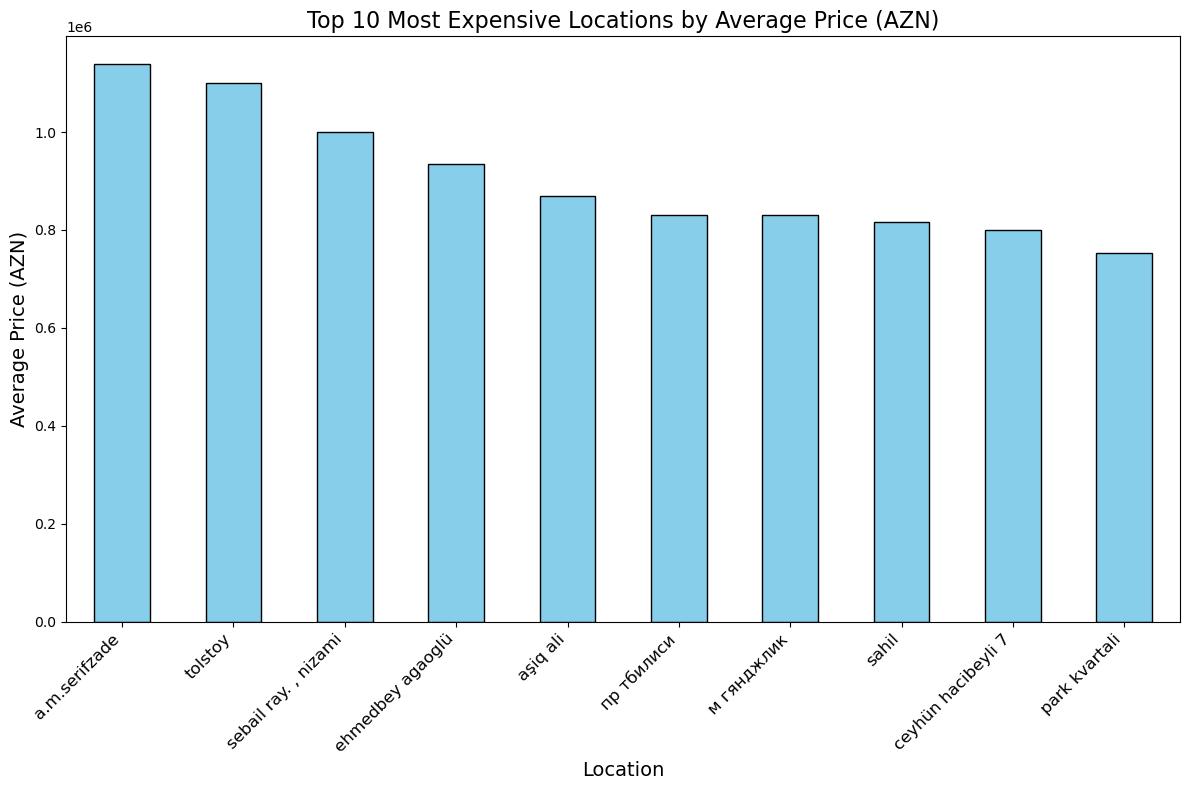

In [56]:
location_prices = df.groupby('Location')['Price(AZN)'].mean()

top_10_locations = location_prices.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_10_locations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Expensive Locations by Average Price (AZN)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Price (AZN)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


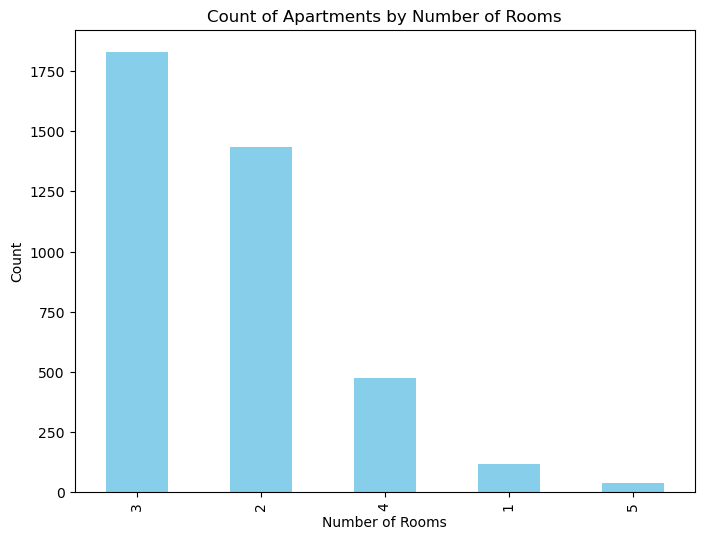

In [58]:
room_counts = df['Rooms'].value_counts()

plt.figure(figsize=(8, 6))
room_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Apartments by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.show()


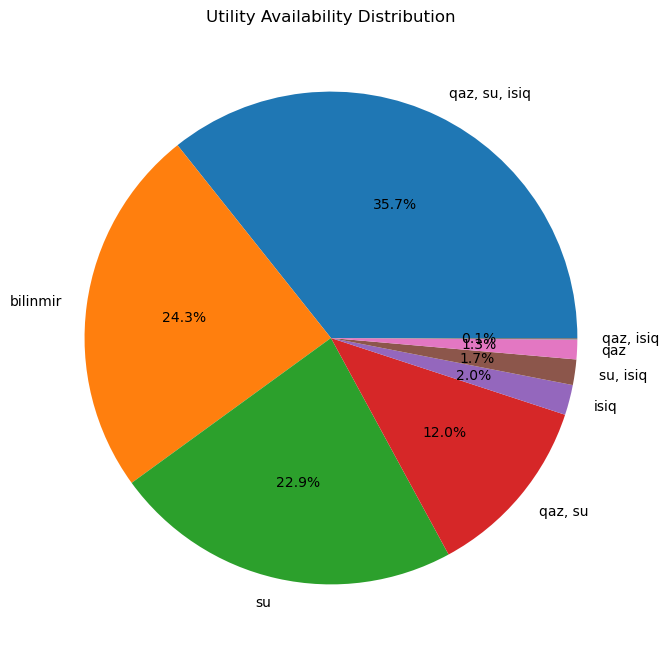

In [60]:
utility_counts = df['Utility'].value_counts()

plt.figure(figsize=(8, 8))
utility_counts.plot(kind='pie', autopct='%1.1f%%',labels=utility_counts.index)
plt.title('Utility Availability Distribution')
plt.ylabel('')
plt.show()


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3888 entries, 0 to 3957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Price(AZN)        3888 non-null   int32         
 1   Date              3888 non-null   datetime64[ns]
 2   Text              3888 non-null   object        
 3   Location          3888 non-null   object        
 4   Area/m2           3888 non-null   float64       
 5   Rooms             3888 non-null   int32         
 6   Located Floor     3888 non-null   int32         
 7   Number of Floors  3888 non-null   int32         
 8   Repair            3888 non-null   object        
 9   Document          3888 non-null   object        
 10  Date_Day          3888 non-null   int64         
 11  Condition         3888 non-null   object        
 12  Utility           3888 non-null   object        
 13  Yaxinliqda var    3888 non-null   object        
dtypes: datetime64[ns](1), float64

In [64]:
categorical_columns = ['Location', 'Repair', 'Document', 'Condition', 'Utility', 'Yaxinliqda var']
df = pd.get_dummies(df, columns=categorical_columns,drop_first=True)

In [66]:
df.to_csv(' processed_data_team_11.csv', index=False)